In [28]:
# importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, silhouette_score
from scipy.stats import ks_2samp
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

plt.style.use("fivethirtyeight")

In [2]:
# load dataset
df = pd.read_csv('C:/Documents/Files/regression_dataset.csv')

In [3]:
# View first rows
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,1.575876,0.891863,-0.726774,-0.047799,-0.657035,-1.113295,-0.877617,0.994558,-0.299696,-0.761760,-62.955657
1,0.535459,1.266661,-1.779875,1.209010,-0.113158,-0.971062,1.064171,-0.555273,0.741320,-0.987523,108.721847
2,-0.686279,0.157128,0.145836,-1.432671,-0.666849,0.176190,0.585299,0.197917,-0.404362,-0.607472,-115.541354
3,0.925282,0.395914,0.676357,0.168651,1.574147,-0.117172,-0.037687,-0.345907,0.895796,-0.837381,36.413165
4,-0.558922,1.073632,1.565524,0.377212,0.132970,-1.026515,-0.065750,-0.700121,-1.523187,1.195047,130.839469


In [4]:
# View shape
df.shape

(1000, 11)

In [5]:
# checking null values
df.isnull().sum()

feature_0    0
feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
feature_6    0
feature_7    0
feature_8    0
feature_9    0
target       0
dtype: int64

In [6]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  1000 non-null   float64
 1   feature_1  1000 non-null   float64
 2   feature_2  1000 non-null   float64
 3   feature_3  1000 non-null   float64
 4   feature_4  1000 non-null   float64
 5   feature_5  1000 non-null   float64
 6   feature_6  1000 non-null   float64
 7   feature_7  1000 non-null   float64
 8   feature_8  1000 non-null   float64
 9   feature_9  1000 non-null   float64
 10  target     1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB


In [7]:
# Separate Features (X) and Target (y)
X = df.drop('target', axis=1)
y = df['target']

In [8]:
# Split into Training and Testing Sets (80% Train, 20% Test)
# This allows us to validate the model's accuracy on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Preprocessing: Standardization
# It is important to scale features so they have mean=0 and variance=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Initialize and Train the Model
# We use Linear Regression because the data has a linear relationship
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [12]:
# Make Predictions
y_pred = model.predict(X_test_scaled)

In [13]:
# Evaluate Performance (Accuracy)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [14]:
# R2score 
print("\n--- Model Performance ---")
print(f"R² Score (Accuracy): {r2:.4f}  (1.0 is perfect)")
print(f"Mean Squared Error:  {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")


--- Model Performance ---
R² Score (Accuracy): 1.0000  (1.0 is perfect)
Mean Squared Error:  0.0095
Mean Absolute Error: 0.0777


In [16]:
# check for overfitting
train_r2 = model.score(X_train_scaled, y_train)
test_r2  = model.score(X_test_scaled, y_test)

print("Train R²:", train_r2)
print("Test  R²:", test_r2)


Train R²: 0.9999994730527467
Test  R²: 0.9999994362016347


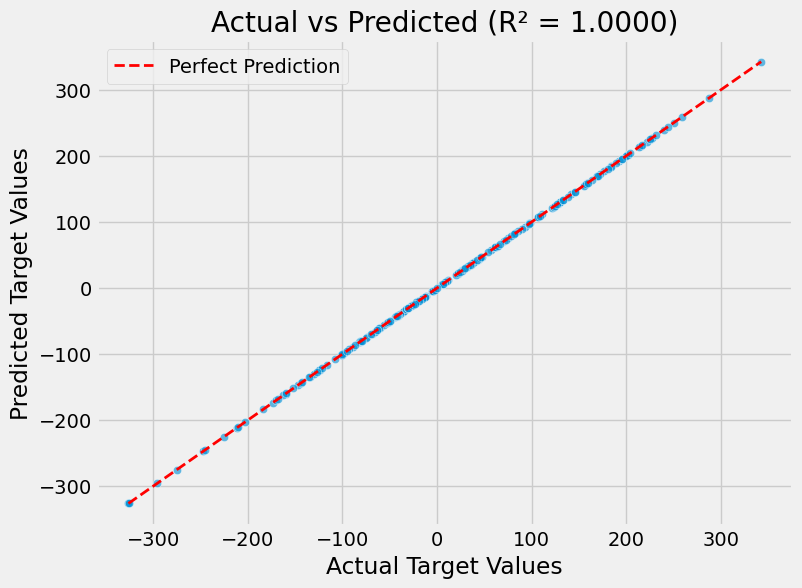

In [15]:
# Visualize: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title(f'Actual vs Predicted (R² = {r2:.4f})')
plt.legend()
plt.show()

In [22]:
# combning train and test
X_scaled = scaler.fit_transform(X)

In [23]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters

sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.4f}")
print("Cluster Counts:\n", df['cluster'].value_counts())


Silhouette Score: 0.0685
Cluster Counts:
 cluster
0    344
1    335
2    321
Name: count, dtype: int64


C:\Users\Aasim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


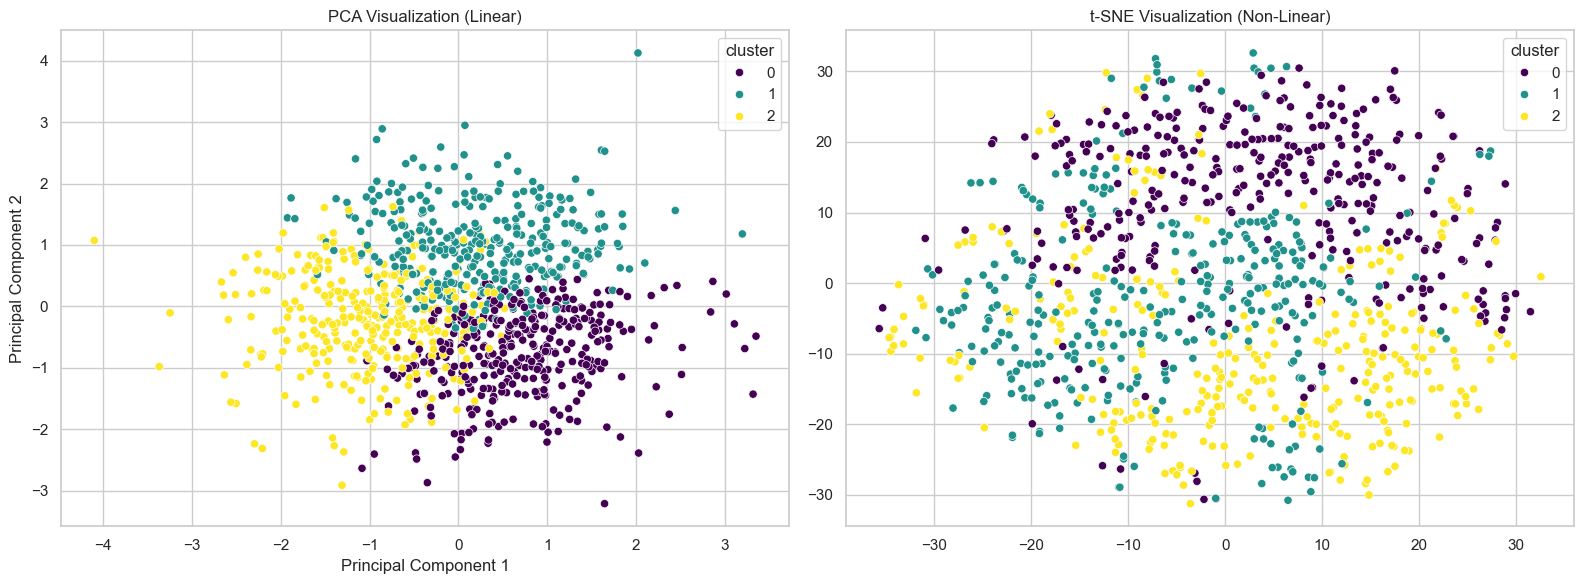

In [24]:
# PCA (Principal Component Analysis)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2. t-SNE (t-Distributed Stochastic Neighbor Embedding)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot PCA
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis', ax=axes[0])
axes[0].set_title('PCA Visualization (Linear)')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# Plot t-SNE
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['cluster'], palette='viridis', ax=axes[1])
axes[1].set_title('t-SNE Visualization (Non-Linear)')

plt.tight_layout()
plt.savefig('pca_vs_tsne.png')
plt.show()

In [29]:
# Initialize SGD Regressor with L1 penalty (Lasso)
# alpha controls the strength of regularization
sgd_reducer = SGDRegressor(penalty='l1', alpha=0.1, max_iter=1000, random_state=42)

# Fit to the data
sgd_reducer.fit(X_scaled, y)

# Analyze Results
coefficients = sgd_reducer.coef_
print("Coefficients:", coefficients)

# Identify features reduced to zero
zero_features = np.sum(coefficients == 0)
print(f"Number of features reduced to 0 (removed): {zero_features}")

# Evaluate Model Performance (MSE)
y_pred = sgd_reducer.predict(X_scaled)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Coefficients: [34.6048801  32.17186244 28.94017772 77.49814638  6.96016558 10.36274561
 72.01406646  9.17640657  5.23932668 58.90154745]
Number of features reduced to 0 (removed): 0
Mean Squared Error: 0.1108


KS Statistic: 0.0550
P-Value: 0.7061
Result: We cannot reject H0. The distributions are likely the same.


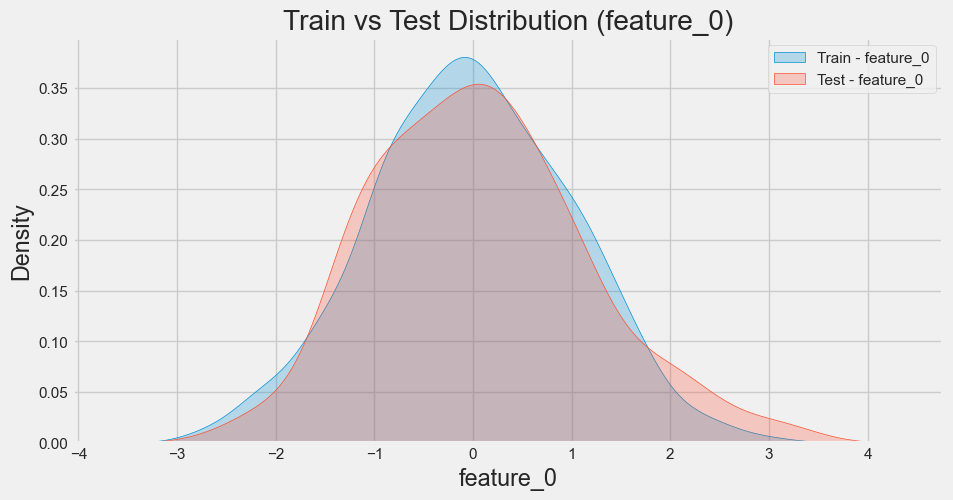

In [30]:
# Perform KS Test
# Null Hypothesis (H0): The two distributions are identical
ks_stat, p_value = ks_2samp(X_train['feature_0'], X_test['feature_0'])


print(f"KS Statistic: {ks_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value > 0.05:
    print("Result: We cannot reject H0. The distributions are likely the same.")
else:
    print("Result: We reject H0. The distributions are different.")

# Visualization
plt.figure(figsize=(10, 5))
sns.kdeplot(X_train['feature_0'], label='Train - feature_0', fill=True)
sns.kdeplot(X_test['feature_0'], label='Test - feature_0', fill=True)
plt.title('Train vs Test Distribution (feature_0)')
plt.legend()
plt.savefig('dist_comparison.png')
plt.show()